In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def readFile(filename):
    df = pd.read_csv(filename)
    return df.values

In [3]:
def distance(x1,x2):
    return np.sqrt(sum((x2-x1)**2))

In [46]:
def knn(x,y,query,k):
    
    vals = []
    m = x.shape[0]
    for i in  range(m):
        d = distance(query,x[i])
        vals.append((d,y[i]))
            
    vals.sort()
    vals = vals[:k]
    vals = np.array(vals)
    new_vals = np.unique(vals[:,1], return_counts = True )   
    index = new_vals[1].argmax()
    pred = new_vals[0][index]
    
    return pred

In [48]:
x_train = readFile('./Training Data/Diabetes_XTrain.csv')
y_train = readFile('./Training Data/Diabetes_YTrain.csv').reshape(-1,)
x_test = readFile('./Testing Data/Diabetes_XTest.csv')

m = x_test.shape[0]
pred = []

for i in range(m):
    knn_ = knn(x_train,y_train,x_test[i],int(np.sqrt(x_test.shape[0])))
    pred.append(knn_)
    
pred = np.array(pred,dtype = int)
print(pred)

[0 0 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 0 1 0 0 0 1 0 0 1 0 1 0 1 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 1 1 0 0 0 1 1 1 0 0 1
 1 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 1 0 0 0 0 1 1 1 0 0 1 1 1 1 0 0 1
 1 1 0 0 1 0 0 1 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 1 0 1
 0 0 0 0 1 0 0]


predicted classes : [0 1]
Size of each predicted class is : [130  62]



Text(0.5, 1.0, 'Diabetes Classification')

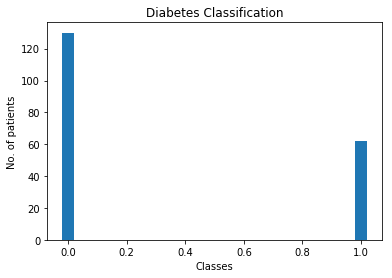

In [76]:
class_,size_class = np.unique(pred,return_counts = True)

print("predicted classes : " + str(class_)) 
print("Size of each predicted class is : " + str(size_class))
print()

plt.bar(class_, size_class, width = 1/25)
plt.ylabel("No. of patients")
plt.xlabel("Classes")
plt.title("Diabetes Classification")